<a href="https://colab.research.google.com/github/studentbhagya/voilet-demo/blob/main/Generative_AI_(text_summarizer).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf


In [3]:
text_file = tf.keras.utils.get_file(
    fname = 'fra-eng.zip',
    origin = "http://storage.googleapis.com/download.tensorflow.org/data/fra-eng.zip",
    extract = True,
    )

3423204/3423204 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
import pathlib

In [5]:
extracted_dir_path = text_file  # text_file from mEOefshNz1GC is the extracted directory path
text_file = pathlib.Path(extracted_dir_path) / 'fra.txt'

In [6]:
print(text_file)

/root/.keras/datasets/fra-eng_extracted/fra.txt


In [7]:
with open(text_file) as fp:
  text_pair = [line for line in fp]

In [8]:
import random
for _ in range(5):
  print(random.choice(text_pair))

I know Tom will agree.	Je sais que Tom sera d'accord.

Could you speak more slowly?	Pouvez-vous parler plus lentement ?

The painting is all but finished.	Le tableau est presque terminé.

I'm sorry, my father is out.	Je suis désolé, mon père ne fait plus partie du groupe.

They understood that.	Elles l'ont compris.



DATA PROCESSING Basic using unicode

In [9]:
import unicodedata
import re #regular expression to clean the data

In [10]:
def normalize(line):
  line = unicodedata.normalize('NFKC', line.strip().lower())
  line = re.sub(r"^([^ \w])(?!\s)", r"\1",line)
  line = re.sub(r"(\s[^ \w])(?!\s)", r"\1",line)
  line = re.sub(r"^([^ \w])(?!\s)", r"\1",line)
  line = re.sub(r"^([^ \w])(?!\s)", r"\1",line)
  eng , fre = line.split('\t')
  fre = '[start]' + fre + '[end]'
  return eng , fre

In [11]:
with open(text_file) as fp:
  text_pair = [normalize(line) for line in fp]

In [12]:
for _ in range(5):
  print(random.choice(text_pair))

('my parents hardly ever punished me for anything.', "[start]mes parents ne m'ont pour ainsi dire jamais punie pour quoi que ce soit.[end]")
("i've decided to buy the blue car.", "[start]j'ai décidé d'acheter la voiture bleue.[end]")
('i want to see them again.', "[start]j'ai envie de les revoir.[end]")
('he is the fastest runner in our class.', '[start]il est le coureur le plus rapide de la classe.[end]')
('this is a good deal.', "[start]c'est un bon accord.[end]")


In [13]:
eng_tokens , fre_tokens = set(), set()
eng_maxlen, fre_maxlen = 0, 0
for eng , fre in text_pair:
  eng_sentence_tokens = eng.split()
  fre_sentence_tokens = fre.split()
  eng_maxlen = max(eng_maxlen, len(eng_sentence_tokens))
  fre_maxlen = max(fre_maxlen, len(fre_sentence_tokens))
  eng_tokens.update(eng_sentence_tokens)
  fre_tokens.update(fre_sentence_tokens)

print(f"total token in english (eng_tokens): {eng_tokens}")
print(f"total token in french (fre_tokens): {fre_tokens}")
print(f"max length of english (eng_maxlen): {eng_maxlen}")
print(f"max length of french (fre_maxlen): {fre_maxlen}")

total token in english (eng_tokens): {'slippers.', 'toothache.', 'countries.', 'operating', 'complains.', 'maid.', 'earns.', 'inspiring.', 'bomb?', 'exit', 'proud.', 'petered', 'proofread', 'exaggeration.', 'vein.', 'smartly', 'superficial', 'tasty.', 'boys.', 'missile.', 'overboard.', 'oranges?', 'pronounce.', 'done?', 'sympathetic', 'evict', 'caramel-flavored', 'weight.', 'drank.', 'beat', 'warfare.', 'decrease.', 'gate.', 'traitor.', 'nouns', 'being', 'blameless.', 'previous', 'narrowly', 'illinois.', 'rent', 'wrestling', 'help."', 'hanger.', 'vehicle.', 'nikko?', 'yachts', 'temples', 'enthusiastic.', 'mushrooms.', 'obstructed', 'cries', 'poignant', 'absolute', 'wish', 'way,', 'modern.', 'film.', 'kiss?', 'carbon-to-nitrogen', 'prejudiced.', 'motor.', 'absence?', 'prohibits', 'cats,', 'games', 'reversing', 'blinking', 'scarcely', 'merger.', 'floss', 'resignation.', 'linux.', 'papers,', 'shoelace', 'hotel', 'entertaining', 'seventeen.', 'coat?', 'analyze', 'reports.', 'grateful', 'in

using pickle file to save file not in variable (saves for longer time )

In [14]:
import pickle

with open("text_pairs.pickle" , 'wb') as fp:
  pickle.dump(text_pair, fp)

In [15]:
# emedding layer
# positional encoding
# attention mode

1st TRANSFORMERS embedding layer (text to numerics)

2nd POSITIONAL encoding layer for all vector

3rd ATTENTION layer

In [16]:
from tensorflow.keras.layers import TextVectorization
import pickle
import os # Import os module to check for file existence
import pathlib # Import pathlib to construct the file path
import tensorflow as tf # Import tensorflow to use get_file
import unicodedata # Import unicodedata for normalize function
import re # Import re for normalize function

# Define the normalize function here
def normalize(line):
  line = unicodedata.normalize('NFKC', line.strip().lower())
  line = re.sub(r"^([^ \w])(?!\s)", r"\1",line)
  line = re.sub(r"(\s[^ \w])(?!\s)", r"\1",line)
  line = re.sub(r"^([^ \w])(?!\s)", r"\1",line)
  line = re.sub(r"^([^ \w])(?!\s)", r"\1",line)
  eng , fre = line.split('\t')
  fre = '[start]' + fre + '[end]'
  return eng , fre


# Check if text_pairs.pickle exists before attempting to load
if not os.path.exists("text_pairs.pickle"):
    # Re-run data loading and processing if the pickle file is missing
    print("text_pairs.pickle not found. Re-running data loading and processing.")

    # Re-run data loading and extraction
    text_file_zip = tf.keras.utils.get_file(
        fname = 'fra-eng.zip',
        origin = "http://storage.googleapis.com/download.tensorflow.org/data/fra-eng.zip",
        extract = True,
    )
    extracted_dir_path = text_file_zip
    text_file = pathlib.Path(extracted_dir_path) / 'fra.txt'

    # Use the normalize function
    with open(text_file) as fp:
        text_pair = [normalize(line) for line in fp]
    with open("text_pairs.pickle" , 'wb') as fp:
        pickle.dump(text_pair, fp)
else:
    with open("text_pairs.pickle", 'rb') as fp:
        text_pair = pickle.load(fp)

In [17]:
import random # Import random module
random.shuffle(text_pair)

In [18]:
n_val = int(.15*len(text_pair))
n_train = len(text_pair) - 2*n_val
train_pair = text_pair[:n_train]
test_pair = text_pair[n_train+n_val:]

In [19]:
vocab_en = 10000
vocab_fr = 20000
seq_length =25

In [20]:
eng_vect = TextVectorization(
    max_tokens = vocab_en,
    standardize = None,
    split = 'whitespace',
    output_mode = 'int',
    output_sequence_length = seq_length
)

In [21]:
fre_vect = TextVectorization(
    max_tokens = vocab_fr,
    standardize = None,
    split = 'whitespace',
    output_mode = 'int',
    output_sequence_length = seq_length
)

In [22]:
train_eng = [pair[0] for pair in train_pair]
train_fre = [pair[1] for pair in train_pair]

In [23]:
eng_vect.adapt(train_eng)
fre_vect.adapt(train_fre)

In [24]:
with open('vectorize.pickle', 'wb') as fp:
  data = {'train': train_pair,
          'test': test_pair,
          'eng_vect': eng_vect.get_config(),
          'fre_vect': fre_vect.get_config(),
          'eng_weights' : eng_vect.get_weights(),
          'fre_weights' : fre_vect.get_weights()
  }
  pickle.dump(data, fp)

In [25]:
import os # Import os module to check for file existence

# Check if vectorize.pickle exists before attempting to load
if not os.path.exists("vectorize.pickle"):
    print("vectorize.pickle not found. Please ensure the previous steps to create it were successful.")
else:
    with open("vectorize.pickle", 'rb') as fp:
        data = pickle.load(fp)

In [26]:
train_pair = data['train']
test_pair = data['test']

eng_vect = TextVectorization.from_config(data['eng_vect'])
eng_vect.set_weights(data['eng_weights'])
fre_vect = TextVectorization.from_config(data['fre_vect'])
fre_vect.set_weights(data['fre_weights'])

# Re-adapt the layers to initialize the lookup tables
train_eng = [pair[0] for pair in train_pair]
train_fre = [pair[1] for pair in train_pair]
eng_vect.adapt(train_eng)
fre_vect.adapt(train_fre)

In [27]:
import tensorflow as tf

def format_dataset(eng, fre):

  eng = eng_vect(eng)
  fre = fre_vect(fre)
  # Ensure decoder input has sequence length 25 by padding
  dec_input = fre[:,:-1]
  paddings = [[0, 0], [0, tf.maximum(0, 25 - tf.shape(dec_input)[1])]]
  dec_input = tf.pad(dec_input, paddings, "CONSTANT")

  source = {'enc_input': eng,
            'dec_input': dec_input
  }
  target = fre[:,1:]

  return (source, target)

def make_dataset(pair, batchsize = 64):

  eng_text, fre_text = zip(*pair)
  dataset = tf.data.Dataset.from_tensor_slices((list(eng_text), list(fre_text)))
  # Ensure the dataset is padded to the correct sequence length
  return dataset.shuffle(2048).batch(batchsize).map(format_dataset).prefetch(16).cache()

In [28]:
train_ds = make_dataset(train_pair)
test_ds = make_dataset(test_pair)

In [29]:
for inputs, target in train_ds.take(1):
  # Corrected key names to match the format_dataset function
  print(inputs['enc_input'].shape)
  print(inputs['enc_input'][0])
  print(inputs['dec_input'].shape)
  print(inputs['dec_input'][0])
  print(target.shape)
  print(target[0])

(64, 25)
tf.Tensor(
[   8   16 1873 1632    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0], shape=(25,), dtype=int64)
(64, 25)
tf.Tensor(
[  16   63 5692    1    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0], shape=(25,), dtype=int64)
(64, 24)
tf.Tensor(
[  63 5692    1    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0], shape=(24,), dtype=int64)


In [30]:
# 3rd
import numpy as np
import tensorflow as tf

def pos_enc_matrix(L , d, n = 10000):
  assert d%2 ==0
  d2 = d//2

  p = np.zeros((L, d))
  k = np.arange(L).reshape(-1, 1)
  i = np.arange(d2).reshape(1, -1)
  denom = np.power(n, -i/d2)
  args = k *denom

  p[:, ::2] = np.sin(args)
  p[:, 1::2] = np.cos(args)

  return p

In [31]:
class PositionalEmbedding(tf.keras.layers.Layer):
  def __init__(self, seq_length, vocab_size, embed_dim, **kwargs):

    super().__init__(**kwargs)
    self.seq_length = seq_length
    self.vocab_size = vocab_size
    self.embed_dim = embed_dim
    self.token_embeddings = tf.keras.layers.Embedding(
        input_dim = vocab_size, output_dim = embed_dim, mask_zero = True)
    matrix = pos_enc_matrix(seq_length, embed_dim)
    self.position_embeddings = tf.constant(matrix, dtype = tf.float32)

  def call(self, inputs):
    embedded_tokens = self.token_embeddings(inputs)
    return embedded_tokens + self.position_embeddings

  def compute_mask(self, *args, **kwargs):
    return self.token_embeddings.compute_mask(*args, **kwargs)

  def get_config(self):
    config = super().get_config()
    config.update({
        'seq_length': self.seq_length,
        'vocab_size': self.vocab_size,
        'embed_dim': self.embed_dim
    })

In [32]:
vocab_en = 10000
vacab_fr = 20000
seq_length = 25

In [33]:
for inputs, targets in train_ds.take(1):
  print(inputs['enc_input'])
  embed_en = PositionalEmbedding(seq_length, vocab_en, embed_dim = 512)

  en_emb = embed_en(inputs['enc_input'])
  print(en_emb._keras_mask)


tf.Tensor(
[[  8 285 102 ...   0   0   0]
 [ 39   3 192 ...   0   0   0]
 [ 19 306  31 ...   0   0   0]
 ...
 [ 24 239 679 ...   0   0   0]
 [  9  16 764 ...   0   0   0]
 [ 25  37 131 ...   0   0   0]], shape=(64, 25), dtype=int64)
tf.Tensor(
[[ True  True  True ... False False False]
 [ True  True  True ... False False False]
 [ True  True  True ... False False False]
 ...
 [ True  True  True ... False False False]
 [ True  True  True ... False False False]
 [ True  True  True ... False False False]], shape=(64, 25), dtype=bool)


NN creating Transformer

self-attention model

In [34]:
def self_attention(input_shape, prifix = 'att', mask = False, **kwargs):

  inputs = tf.keras.layers.Input(shape = input_shape, dtype = 'float32', name = f"{prifix}_init")

  # Remove 'prefix' from kwargs before passing to MultiHeadAttention
  att_kwargs = kwargs.copy()
  att_kwargs.pop('prefix', None)

  attention = tf.keras.layers.MultiHeadAttention(name = f"{prifix}_atti", **att_kwargs)
  norm = tf.keras.layers.LayerNormalization(name = f"{prifix}_norm1")
  add = tf.keras.layers.Add(name = f"{prifix}_add1")
  attout = attention(query = inputs, value = inputs, key = inputs, use_causal_mask = mask)
  output = norm(add([inputs, attout]))
  model = tf.keras.Model(inputs = inputs, outputs = output, name = f"{prifix}_att")
  return model

In [35]:
seq_length = 25
key_dim = 120
num_heads = 8

model = self_attention(input_shape = (seq_length, key_dim), num_heads = num_heads, key_dim = key_dim)

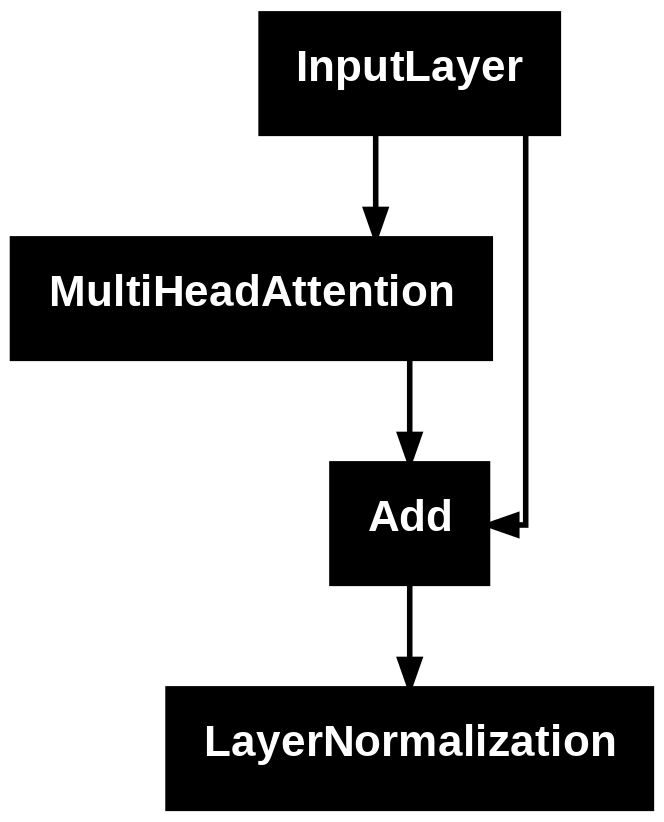

In [36]:
tf.keras.utils.plot_model(model)

In [37]:
def cross_attention(input_shape, contest_shape, prifix = 'att', **kwargs):

  inputs = tf.keras.layers.Input(shape = input_shape, dtype = 'float32', name = f"{prifix}_in2")
  context = tf.keras.layers.Input(shape = contest_shape, dtype = 'float32', name = f"{prifix}_ctx2")

  # Remove 'prefix' from kwargs before passing to MultiHeadAttention
  att_kwargs = kwargs.copy()
  att_kwargs.pop('prefix', None)

  attention = tf.keras.layers.MultiHeadAttention(name = f"{prifix}_atti", **att_kwargs)
  norm = tf.keras.layers.LayerNormalization(name = f"{prifix}_norm2")
  add = tf.keras.layers.Add(name = f"{prifix}_add2")

  attout = attention(query = inputs, value = context, key = context)
  output = norm(add([inputs, attout]))
  model = tf.keras.Model(inputs = [inputs, context], outputs = output, name = f"{prifix}_crs_at")

  return model

In [38]:
model = cross_attention(input_shape = (seq_length, key_dim), contest_shape = (seq_length, key_dim), num_heads = num_heads, key_dim = key_dim)


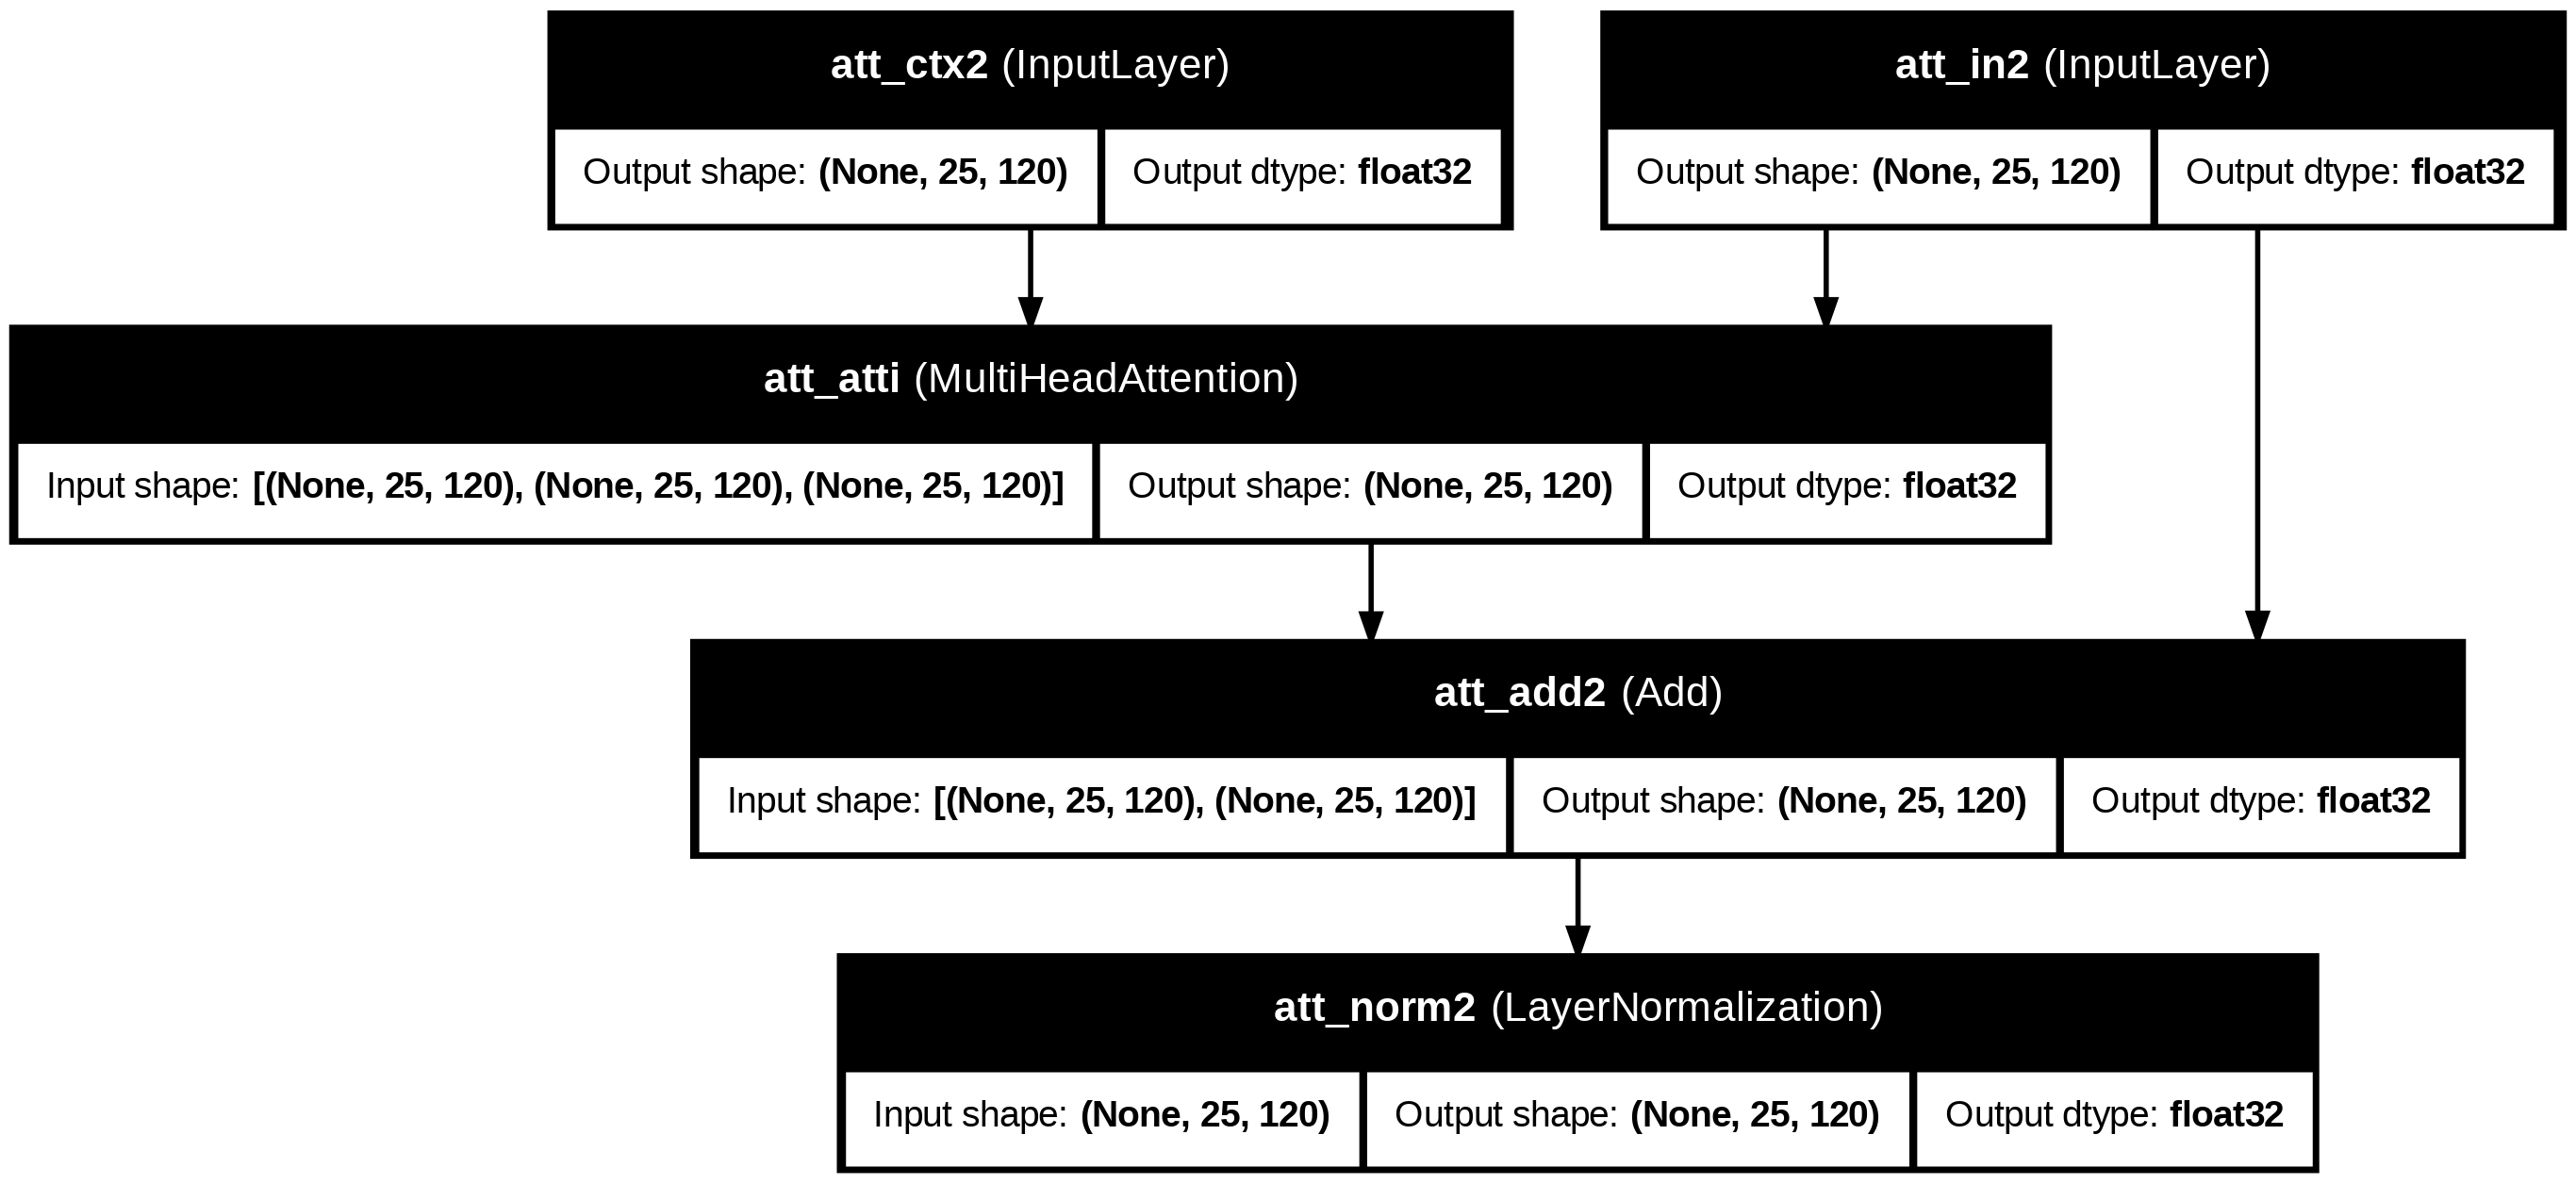

In [39]:
tf.keras.utils.plot_model(model, show_shapes= True, show_dtype = True, show_layer_names = True, show_layer_activations=True)

FEED FORWARD NN (Regular network)

In [40]:
def feed_forward(input_shape,model_dim, ff_dim, dropout = .1, prefix = 'ff'):
  inputs = tf.keras.layers.Input(shape = input_shape, dtype = 'float32', name = f"{prefix}_in3")
  dense1 = tf.keras.layers.Dense(ff_dim, name = f'{prefix}_ff1', activation = 'relu')
  dense2 = tf.keras.layers.Dense(model_dim, name = f'{prefix}_ff2')
  drop = tf.keras.layers.Dropout(dropout, name = f'{prefix}_drop')
  add = tf.keras.layers.Add(name = f'{prefix}_add3')

  ffout = drop(dense2(dense1(inputs)))

  norm = tf.keras.layers.LayerNormalization(name = f'{prefix}_norm3')
  output = add([inputs, ffout])
  model = tf.keras.Model(inputs = inputs, outputs = output, name = f"{prefix}_ff")
  return model

In [41]:
ff_dim = 512

model = feed_forward(input_shape = (seq_length, key_dim), model_dim = key_dim, ff_dim = ff_dim)

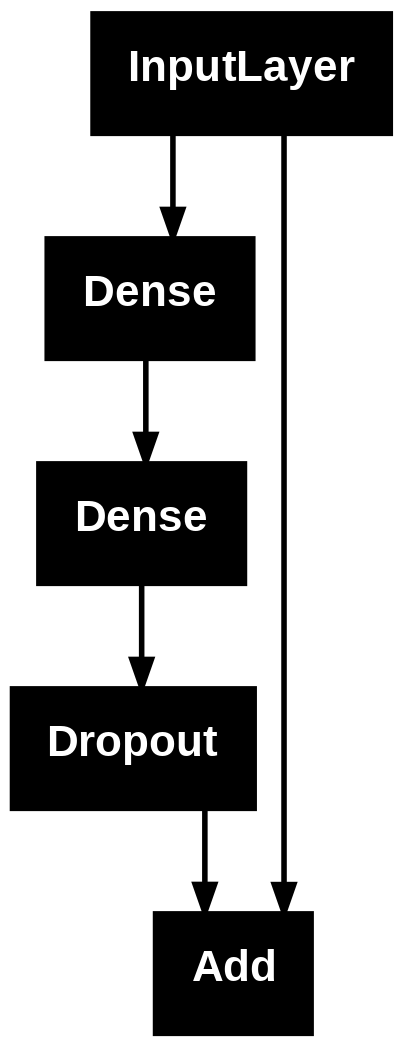

In [42]:
tf.keras.utils.plot_model(model)

In [43]:
import tensorflow as tf

def encoder(input_shape, key_dim, ff_dim, dropout = .1, prefix = 'enc', **kwargs):
  inputs = tf.keras.layers.Input(shape = input_shape, dtype = 'float32', name = f"{prefix}_in0")
  # Remove 'prefix' from kwargs before passing to self_attention
  att_kwargs = kwargs.copy()
  att_kwargs.pop('prefix', None)
  attention_output = self_attention(input_shape, prifix = f"{prefix}_self_att", key_dim = key_dim,mask = False, **att_kwargs)(inputs)
  output = feed_forward(input_shape, key_dim, ff_dim, dropout, prefix = f"{prefix}_ff")(attention_output)
  model = tf.keras.Model(inputs = inputs, outputs = output, name = prefix)
  return model

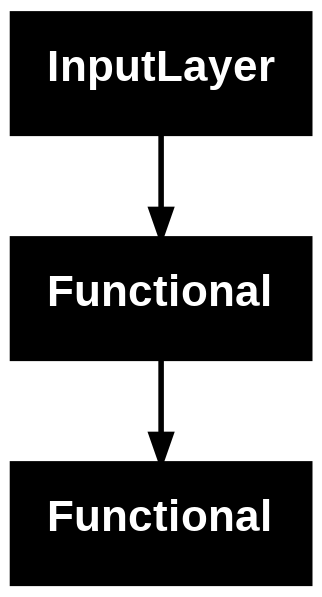

In [44]:
seq_length = 25
key_dim = 128
ff_dim = 512
num_heads = 8

model = encoder(input_shape = (seq_length, key_dim), key_dim = key_dim, ff_dim = ff_dim, num_heads = num_heads)
tf.keras.utils.plot_model(model)


DECODER METHOD

In [45]:
import tensorflow as tf

def decoder(input_shape, key_dim, ff_dim, dropout = .1, prefix = 'dec', **kwargs):
  import tensorflow as tf
  inputs = tf.keras.layers.Input(shape = input_shape, dtype = tf.float32, name = f"{prefix}_in0")
  context = tf.keras.layers.Input(shape = input_shape, dtype = tf.float32, name = f"{prefix}_ctx0")
  # Remove 'prefix' from kwargs before passing to self_attention and cross_attention
  att_kwargs = kwargs.copy()
  att_kwargs.pop('prefix', None)
  attmodel = self_attention(input_shape, key_dim=key_dim, mask = True, prefix = f"{prefix}_self_att", **att_kwargs) # Pass prefix to self_attention
  crossmodel = cross_attention(input_shape, input_shape, key_dim = key_dim, prefix = f"{prefix}_cross_att", num_heads = att_kwargs['num_heads']) # Pass prefix to cross_attention
  ff_model = feed_forward(input_shape, key_dim, ff_dim, dropout, prefix = f"{prefix}_ff")

  x = attmodel(inputs)
  x = crossmodel([x, context])
  output = ff_model(x)
  model = tf.keras.Model(inputs = [inputs, context], outputs = output, name = prefix)
  return model


"""seq_length = 25
key_dim = 128
ff_dim = 512
num_heads = 8

model = decoder(input_shape = (seq_length, key_dim), key_dim = key_dim, ff_dim = ff_dim, num_heads = num_heads)
tf.keras.utils.plot_model(model)"""

'seq_length = 25\nkey_dim = 128\nff_dim = 512\nnum_heads = 8\n\nmodel = decoder(input_shape = (seq_length, key_dim), key_dim = key_dim, ff_dim = ff_dim, num_heads = num_heads)\ntf.keras.utils.plot_model(model)'

TRANSFORMER MODEL


In [46]:
def transformer(num_layers, num_heads, seq_length, key_dim, ff_dim, vocab_size_en, vocab_size_fr, dropout = .1, name = 'transformer'):

  input_enc = tf.keras.layers.Input(shape =(seq_length,), dtype = 'float32', name = 'enc_input')
  input_dec = tf.keras.layers.Input(shape = (seq_length,), dtype = 'float32', name = 'dec_input')

  emb_enc = PositionalEmbedding(seq_length, vocab_size_en, key_dim, name = 'embed_enc')
  emb_dec = PositionalEmbedding(seq_length, vocab_size_fr, key_dim, name = 'embed_dec')

  encoders = [encoder(input_shape = (seq_length, key_dim), key_dim = key_dim, ff_dim = ff_dim, dropout = dropout, prefix = f"enc{i}", num_heads = num_heads)
             for i in range(num_layers)]
  decoders = [decoder(input_shape = (seq_length, key_dim), key_dim = key_dim, ff_dim = ff_dim, dropout = dropout, prefix = f"dec{i}", num_heads = num_heads) # Corrected prefix to "dec"
             for i in range(num_layers)]

  final = tf.keras.layers.Dense(vocab_size_fr, name = 'linear')

  x1 = emb_enc(input_enc)
  x2 = emb_dec(input_dec)
  for layer in encoders:
    x1 = layer(x1)
  for layer in decoders:
    x2 = layer([x2, x1])

  output = final(x2)

  try:
    del output._keras_mask
  except:
    pass

  model = tf.keras.Model(inputs = [input_enc, input_dec], outputs = output, name = name)

  return model

/usr/local/lib/python3.11/dist-packages/keras/src/layers/layer.py:938: UserWarning: Layer 'enc0' (of type Functional) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/layers/layer.py:938: UserWarning: Layer 'dec0' (of type Functional) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(


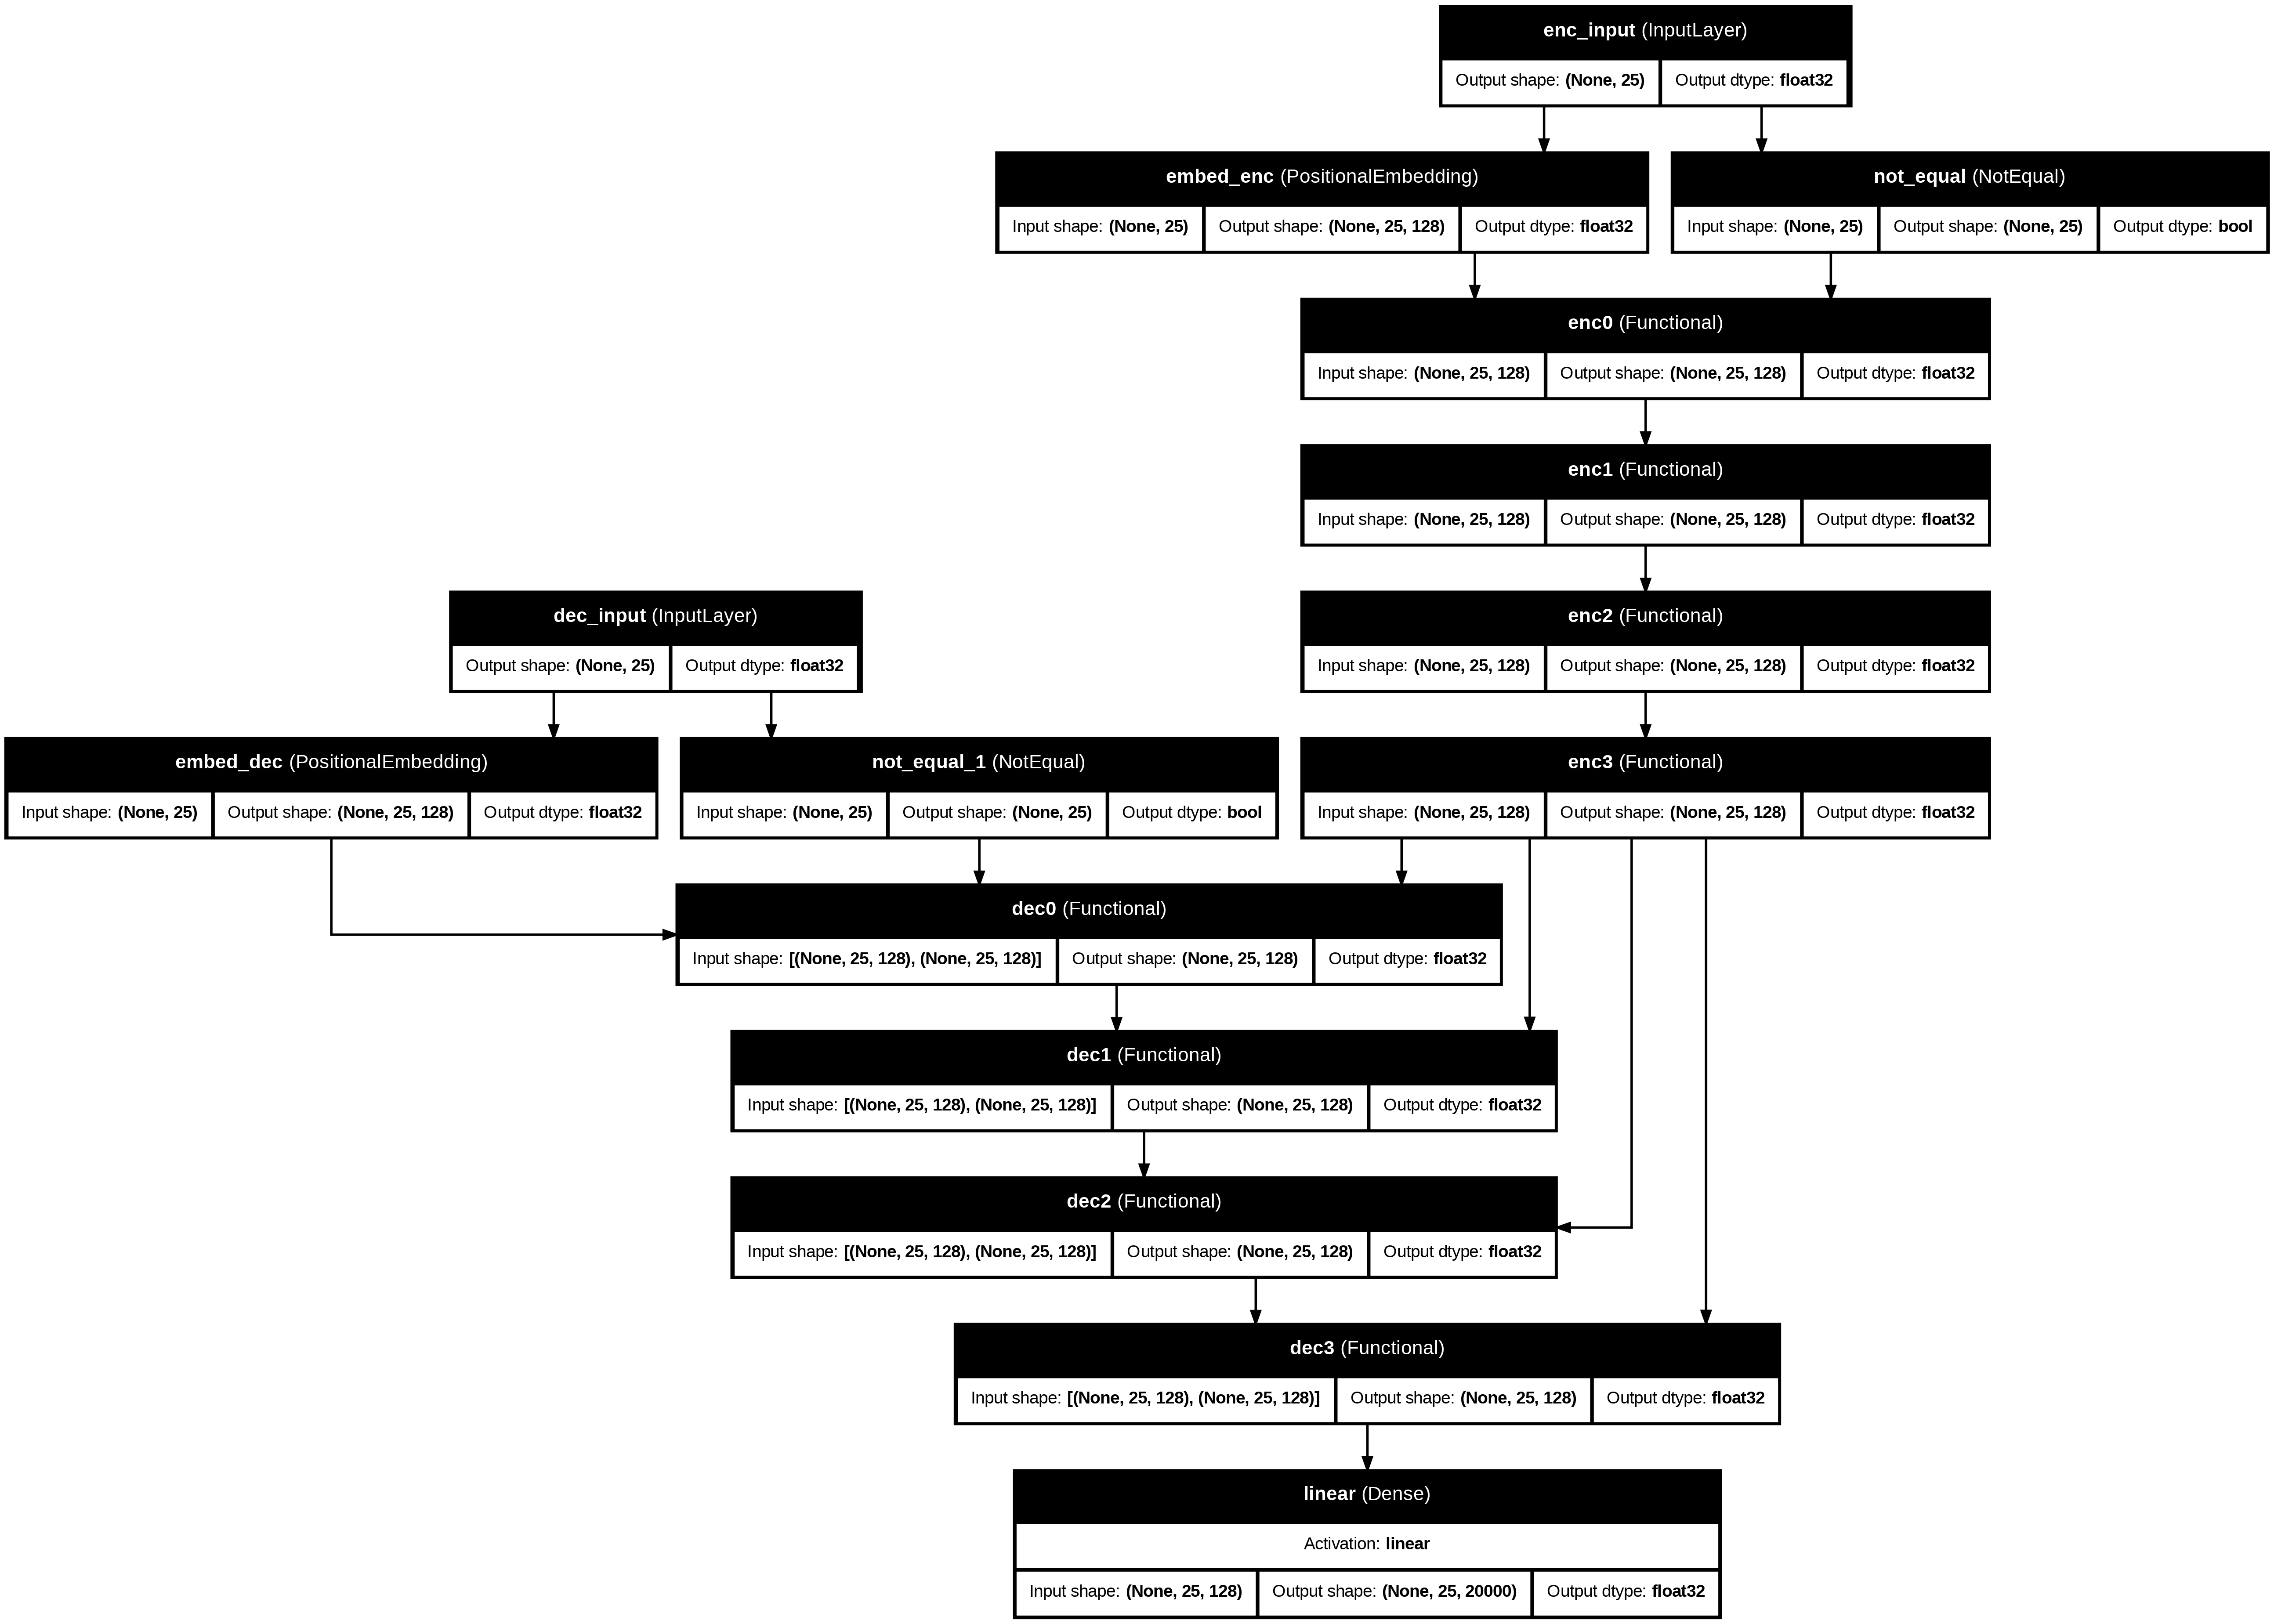

In [47]:
seq_length = 25
num_layers = 4
num_heads = 8
key_dim = 128
ff_dim = 512
dropout = .1
vocab_size_en= 10000
vocab_size_fr = 20000

model = transformer(num_layers=num_layers, num_heads=num_heads, seq_length=seq_length, key_dim=key_dim, ff_dim=ff_dim, vocab_size_en=vocab_size_en, vocab_size_fr=vocab_size_fr, dropout=dropout)

tf.keras.utils.plot_model(model, show_shapes = True, show_dtype= True, show_layer_names = True, show_layer_activations= True)

In [48]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.summary()

Model: "transformer"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ enc_input           │ (None, 25)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embed_enc           │ (None, 25, 128)   │  1,280,000 │ enc_input[0][0]   │
│ (PositionalEmbeddi… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ not_equal           │ (None, 25)        │          0 │ enc_input[0][0]   │
│ (NotEqual)          │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ enc0 (Functional)   │ (None, 25, 128)   │    659,456 │ embed_enc[0][0],  │
│                     │                   │            │ not_equal[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ enc1 (Functional)   │ (None, 25, 128)   │    659,456 │ enc0[0][0]        │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dec_input           │ (None, 25)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ enc2 (Functional)   │ (None, 25, 128)   │    659,456 │ enc1[0][0]        │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embed_dec           │ (None, 25, 128)   │  2,560,000 │ dec_input[0][0]   │
│ (PositionalEmbeddi… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ enc3 (Functional)   │ (None, 25, 128)   │    659,456 │ enc2[0][0]        │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ not_equal_1         │ (None, 25)        │          0 │ dec_input[0][0]   │
│ (NotEqual)          │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dec0 (Functional)   │ (None, 25, 128)   │  1,187,200 │ embed_dec[0][0],  │
│                     │                   │            │ enc3[0][0],       │
│                     │                   │            │ not_equal_1[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dec1 (Functional)   │ (None, 25, 128)   │  1,187,200 │ dec0[0][0],       │
│                     │                   │            │ enc3[0][0]        │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dec2 (Functional)   │ (None, 25, 128)   │  1,187,200 │ dec1[0][0],       │
│                     │                   │            │ enc3[0][0]        │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dec3 (Functional)   │ (None, 25, 128)   │  1,187,200 │ dec2[0][0],       │
│                     │                   │            │ enc3[0][0]        │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ linear (Dense)      │ (None, 25, 20000) │  2,580,000 │ dec3[0][0]        │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 13,806,624 (52.67 MB)

 Trainable params: 13,806,624 (52.67 MB)

 Non-trainable params: 0 (0.00 B)

In [49]:
history = model.fit(train_ds, epochs = 20, validation_data = test_ds)

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/layer.py:938: UserWarning: Layer 'enc0_self_att_att' (of type Functional) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/layers/layer.py:938: UserWarning: Layer 'enc0' (of type Functional) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/layers/layer.py:938: UserWarning: Layer 'att_att' (of type Functional) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(
/usr/local/lib/python3.11/dist

InvalidArgumentError: Graph execution error:

Detected at node Equal defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "/usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py", line 37, in <module>

  File "/usr/local/lib/python3.11/dist-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelapp.py", line 712, in start

  File "/usr/local/lib/python3.11/dist-packages/tornado/platform/asyncio.py", line 205, in start

  File "/usr/lib/python3.11/asyncio/base_events.py", line 608, in run_forever

  File "/usr/lib/python3.11/asyncio/base_events.py", line 1936, in _run_once

  File "/usr/lib/python3.11/asyncio/events.py", line 84, in _run

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 510, in dispatch_queue

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 499, in process_one

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 406, in dispatch_shell

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 730, in execute_request

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py", line 383, in do_execute

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/zmqshell.py", line 528, in run_cell

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code

  File "/tmp/ipython-input-1592410484.py", line 1, in <cell line: 0>

  File "/usr/local/lib/python3.11/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 371, in fit

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 219, in function

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 132, in multi_step_on_iterator

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 113, in one_step_on_data

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 84, in train_step

  File "/usr/local/lib/python3.11/dist-packages/keras/src/trainers/trainer.py", line 490, in compute_metrics

  File "/usr/local/lib/python3.11/dist-packages/keras/src/trainers/compile_utils.py", line 334, in update_state

  File "/usr/local/lib/python3.11/dist-packages/keras/src/trainers/compile_utils.py", line 21, in update_state

  File "/usr/local/lib/python3.11/dist-packages/keras/src/metrics/reduction_metrics.py", line 203, in update_state

  File "/usr/local/lib/python3.11/dist-packages/keras/src/metrics/accuracy_metrics.py", line 240, in sparse_categorical_accuracy

  File "/usr/local/lib/python3.11/dist-packages/keras/src/ops/numpy.py", line 2699, in equal

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/numpy.py", line 1235, in equal

Incompatible shapes: [64,25] vs. [64,24]
	 [[{{node Equal}}]] [Op:__inference_multi_step_on_iterator_32655]

In [50]:
class customSchedule(tf.keras.optimizers.schedules.LearningRateSchedule):

  def __init__(self, key_dim, warmup_steps = 40000):
    super().__init__()
    self.key_dim = key_dim
    self.warmup_steps = warmup_steps

    self.d = tf.cast(self.key_dim, tf.float32)

  def __call__(self, step):
      step = tf.cast(step, tf.float32)
      arg1 = tf.math.rsqrt(step)
      arg2 = step*(self.warmup_steps ** -1.5)
      return tf.math.rsqrt(self.d) * tf.math.minimum(arg1, arg2)

  def get_config(self):
      config = {
          "key_dim" : self.key_dim,
          "warmup_steps" : self.warmup_steps
      }
      return config

key_dim = 128
lr = customSchedule(key_dim)
optimizer = tf.keras.optimizers.Adam(lr, beta_1 = .9, beta_2 = .98, epsilon = 1e-9)

In [51]:
def masked_loss(label, pred):
  # Slice the prediction tensor to match the shape of the label tensor
  pred = pred[:, :-1]
  mask = label != 0
  loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True, reduction = 'none')
  loss = loss_object(label, pred)

  mask = tf.cast(mask, dtype = loss.dtype)
  loss *= mask
  loss = tf.reduce_sum(loss)/tf.reduce_sum(mask)
  return loss

def mask_accuracy(label, pred):
  # Slice the prediction tensor to match the shape of the label tensor
  pred = pred[:, :-1]
  pred = tf.argmax(pred, axis = 2)
  label = tf.cast(label, pred.dtype)
  match = label == pred

  mask = label != 0

  match = match & mask

  match = tf.cast(match, dtype = tf.float32)
  mask = tf.cast(mask, dtype = tf.float32)
  return tf.reduce_sum(match)/tf.reduce_sum(mask)

In [52]:
model.compile(loss = masked_loss, optimizer = optimizer, metrics = [mask_accuracy])
model.summary()

Model: "transformer"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ enc_input           │ (None, 25)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embed_enc           │ (None, 25, 128)   │  1,280,000 │ enc_input[0][0]   │
│ (PositionalEmbeddi… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ not_equal           │ (None, 25)        │          0 │ enc_input[0][0]   │
│ (NotEqual)          │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ enc0 (Functional)   │ (None, 25, 128)   │    659,456 │ embed_enc[0][0],  │
│                     │                   │            │ not_equal[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ enc1 (Functional)   │ (None, 25, 128)   │    659,456 │ enc0[0][0]        │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dec_input           │ (None, 25)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ enc2 (Functional)   │ (None, 25, 128)   │    659,456 │ enc1[0][0]        │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embed_dec           │ (None, 25, 128)   │  2,560,000 │ dec_input[0][0]   │
│ (PositionalEmbeddi… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ enc3 (Functional)   │ (None, 25, 128)   │    659,456 │ enc2[0][0]        │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ not_equal_1         │ (None, 25)        │          0 │ dec_input[0][0]   │
│ (NotEqual)          │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dec0 (Functional)   │ (None, 25, 128)   │  1,187,200 │ embed_dec[0][0],  │
│                     │                   │            │ enc3[0][0],       │
│                     │                   │            │ not_equal_1[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dec1 (Functional)   │ (None, 25, 128)   │  1,187,200 │ dec0[0][0],       │
│                     │                   │            │ enc3[0][0]        │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dec2 (Functional)   │ (None, 25, 128)   │  1,187,200 │ dec1[0][0],       │
│                     │                   │            │ enc3[0][0]        │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dec3 (Functional)   │ (None, 25, 128)   │  1,187,200 │ dec2[0][0],       │
│                     │                   │            │ enc3[0][0]        │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ linear (Dense)      │ (None, 25, 20000) │  2,580,000 │ dec3[0][0]        │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 13,806,624 (52.67 MB)

 Trainable params: 13,806,624 (52.67 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(train_ds, epochs = 20, validation_data = test_ds)

Epoch 1/20
1828/1828 ━━━━━━━━━━━━━━━━━━━━ 12287s 7s/step - loss: 9.2149 - mask_accuracy: 0.0140 - val_loss: 6.6731 - val_mask_accuracy: 0.0601
Epoch 2/20
1330/1828 ━━━━━━━━━━━━━━━━━━━━ 57:23 7s/step - loss: 6.7670 - mask_accuracy: 0.0643

In [ ]:
import matplotlib.pyplot as plt

fig , axes = plt.subplots(2, figsize = (6, 8), sharex = True)
fig.subtitle(
    "training history"
)
x = list(range(1,21))
axes[0].plot(x, history.history['loss'], alpha = 5, label = 'loss')
axes[0].plot(x, history.history['val_loss'], alpha = 5, label = 'val_loss')
axes[0].set_ylabel('loss')
axes[0].legend(loc = 'upper right')
axes[1].plot(x, history.history['mask_accuracy'], alpha = 5, label = 'mask_accuracy')
axes[1].plot(x, history.history['val_mask_accuracy'], alpha = 5, label = 'val_mask_accuracy')
axes[1].set_ylabel('accuracy')
axes[1].set_xlabel('epoch')
axes[1].legend(loc = 'lower right')
plt.show()